In [1]:
library('openxlsx')
library('AUC')
library('verification')

AUC 0.3.0
Type AUCNews() to see the change log and ?AUC to get an overview.
Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-2 (2019-03-07) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 
Loading required package: boot
Loading required package: CircStats
Loading required package: MASS
Loading required package: dtw
Loading required package: proxy

Attaching package: ‘proxy’

The following object is masked from ‘package:spam’:

    as.matrix

The following objects are masked from ‘package:stats’:

 

In [2]:
sheet <- '../input/anomaly values.xlsx'
df <- read.xlsx(xlsxFile = sheet, sheet = 1, skipEmptyRows = FALSE)


In [3]:
head(df)

String,Language,R=3,R=1,R=2,R=4,R=5,R=6,R=7,R=8,R=9
o_pagkakit,Tagalog,31.28750,13.66189,38.27989,31.28750,26.31415,21.29809,16.22404,9.457381,5.754888
forbidden_,English,31.28705,13.33999,37.99657,31.28646,26.31413,21.29809,16.22404,11.059344,5.754888
a_magaabot,Tagalog,31.28700,13.33999,37.99937,31.28659,26.31413,21.29809,16.22404,11.059344,5.754888
a_magaabot,Tagalog,31.28700,13.33999,38.00416,31.28668,26.31413,21.29809,16.22404,11.059344,5.754888
a_nagkadto,Tagalog,31.28694,13.33999,38.00847,31.28670,26.31414,21.29809,16.22404,11.059344,5.754888
a_nagkadto,Tagalog,31.28694,13.33999,38.00868,31.28674,26.31414,21.29809,16.22404,11.059344,5.754888


In [4]:
colnames(df)[colnames(df)=="Score?"] <- "Score"
colnames(df)[colnames(df)=="R=1"] <- "R1"
colnames(df)[colnames(df)=="R=2"] <- "R2"
colnames(df)[colnames(df)=="R=3"] <- "R3"
colnames(df)[colnames(df)=="R=4"] <- "R4"
colnames(df)[colnames(df)=="R=5"] <- "R5"
colnames(df)[colnames(df)=="R=6"] <- "R6"
colnames(df)[colnames(df)=="R=7"] <- "R7"
colnames(df)[colnames(df)=="R=8"] <- "R8"
colnames(df)[colnames(df)=="R=9"] <- "R9"

In [73]:
head(df)

String,Language,R3,R1,R2,R4,R5,R6,R7,R8,R9
o_pagkakit,Tagalog,31.28750,13.66189,38.27989,31.28750,26.31415,21.29809,16.22404,9.457381,5.754888
forbidden_,English,31.28705,13.33999,37.99657,31.28646,26.31413,21.29809,16.22404,11.059344,5.754888
a_magaabot,Tagalog,31.28700,13.33999,37.99937,31.28659,26.31413,21.29809,16.22404,11.059344,5.754888
a_magaabot,Tagalog,31.28700,13.33999,38.00416,31.28668,26.31413,21.29809,16.22404,11.059344,5.754888
a_nagkadto,Tagalog,31.28694,13.33999,38.00847,31.28670,26.31414,21.29809,16.22404,11.059344,5.754888
a_nagkadto,Tagalog,31.28694,13.33999,38.00868,31.28674,26.31414,21.29809,16.22404,11.059344,5.754888


In [5]:
#Number after _ denotes r value
sens_1 <- sensitivity(df$R1, as.factor(df$Language), perc.rank=TRUE)
spec_1 <- specificity(df$R1, as.factor(df$Language), perc.rank=TRUE)

sens_2 <- sensitivity(df$R2, as.factor(df$Language), perc.rank=TRUE)
spec_2 <- specificity(df$R2, as.factor(df$Language), perc.rank=TRUE)

sens_3 <- sensitivity(df$R3, as.factor(df$Language), perc.rank=TRUE)
spec_3 <- specificity(df$R3, as.factor(df$Language), perc.rank=TRUE)

sens_4 <- sensitivity(df$R4, as.factor(df$Language), perc.rank=TRUE)
spec_4 <- specificity(df$R4, as.factor(df$Language), perc.rank=TRUE)

sens_5 <- sensitivity(df$R5, as.factor(df$Language), perc.rank=TRUE)
spec_5 <- specificity(df$R5, as.factor(df$Language), perc.rank=TRUE)

sens_6 <- sensitivity(df$R6, as.factor(df$Language), perc.rank=TRUE)
spec_6 <- specificity(df$R6, as.factor(df$Language), perc.rank=TRUE)

sens_7 <- sensitivity(df$R7, as.factor(df$Language), perc.rank=TRUE)
spec_7 <- specificity(df$R7, as.factor(df$Language), perc.rank=TRUE)

sens_8 <- sensitivity(df$R8, as.factor(df$Language), perc.rank=TRUE)
spec_8 <- specificity(df$R8, as.factor(df$Language), perc.rank=TRUE)

sens_9 <- sensitivity(df$R9, as.factor(df$Language), perc.rank=TRUE)
spec_9 <- specificity(df$R9, as.factor(df$Language), perc.rank=TRUE)


In [76]:
length(sens_1$measure)

[1] 8

In [59]:
roc_df_1 <- data.frame(minus_specificity = 1-spec_1$measure,sensitivity =sens_1$measure)
roc_df_2 <- data.frame(minus_specificity = 1-spec_2$measure,sensitivity =sens_2$measure)
roc_df_3 <- data.frame(minus_specificity = 1-spec_3$measure,sensitivity =sens_3$measure)
roc_df_4 <- data.frame(minus_specificity = 1-spec_4$measure,sensitivity =sens_4$measure)
roc_df_5 <- data.frame(minus_specificity = 1-spec_5$measure,sensitivity =sens_5$measure)
roc_df_6 <- data.frame(minus_specificity = 1-spec_6$measure,sensitivity =sens_6$measure)
roc_df_7 <- data.frame(minus_specificity = 1-spec_7$measure,sensitivity =sens_7$measure)
roc_df_8 <- data.frame(minus_specificity = 1-spec_8$measure,sensitivity =sens_8$measure)
roc_df_9 <- data.frame(minus_specificity = 1-spec_9$measure,sensitivity =sens_9$measure)

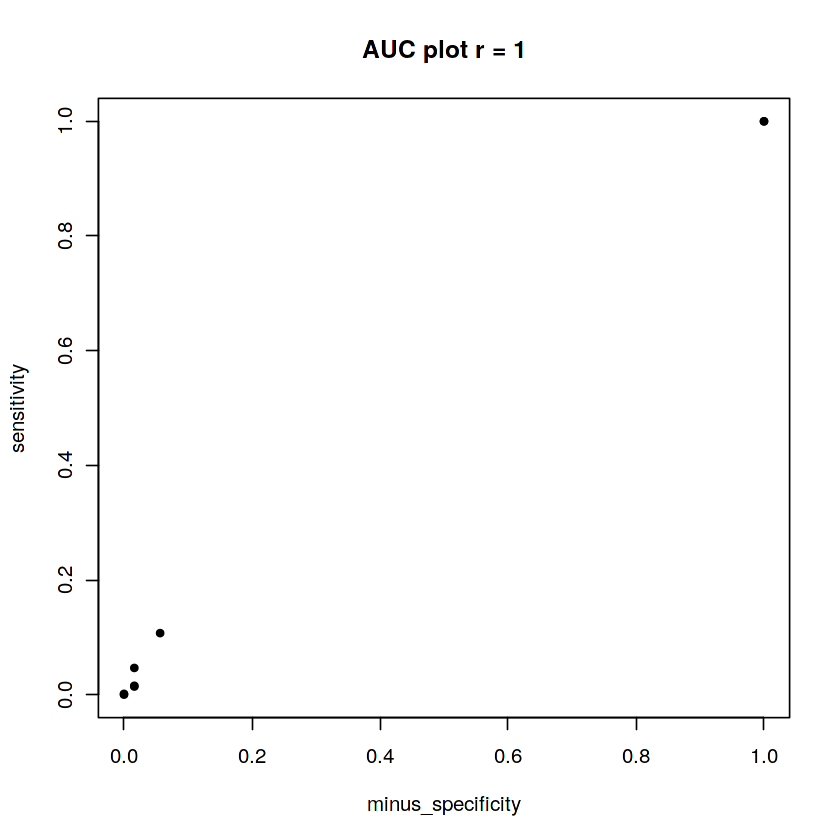

In [60]:
plot(roc_df_1,pch = 20, main= "AUC plot r = 1")

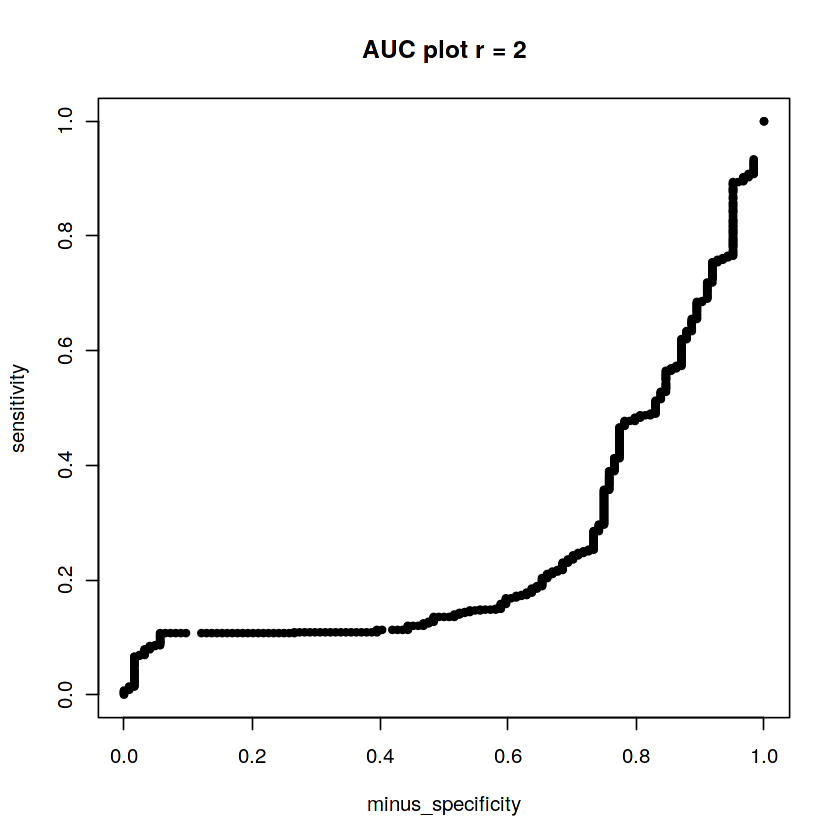

In [61]:
plot(roc_df_2,pch = 20, main= "AUC plot r = 2")

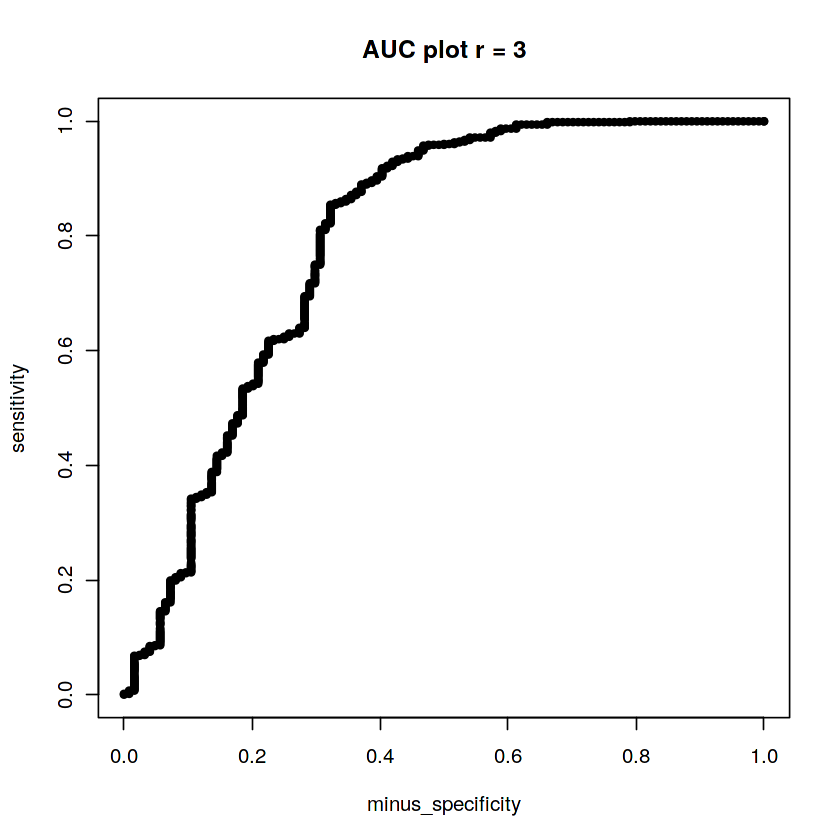

In [62]:
plot(roc_df_3,pch = 20, main= "AUC plot r = 3")

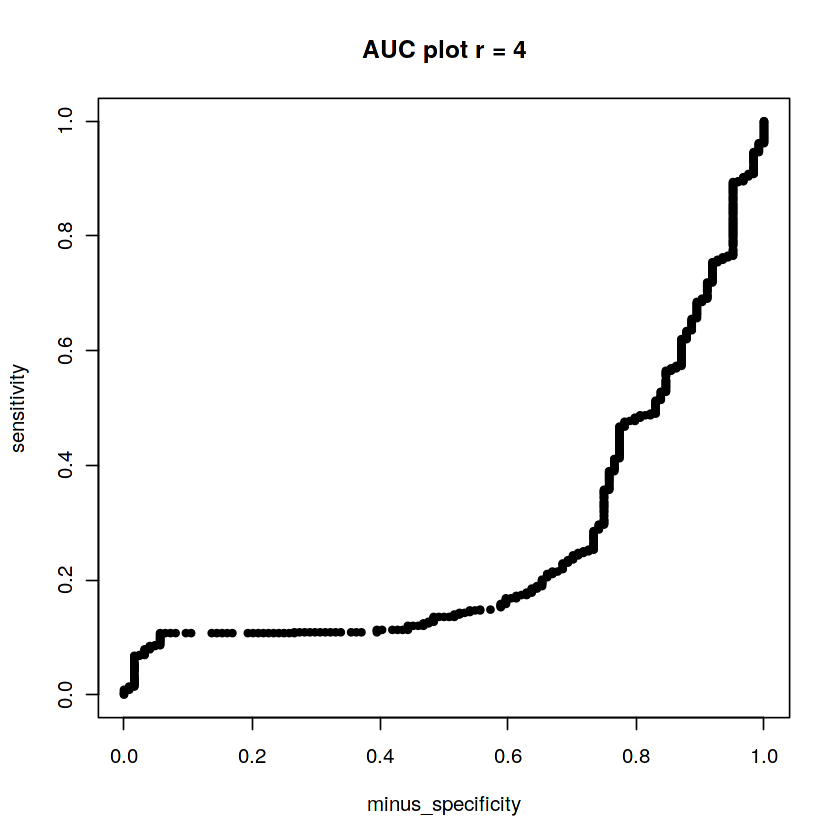

In [63]:
plot(roc_df_4,pch = 20, main= "AUC plot r = 4")

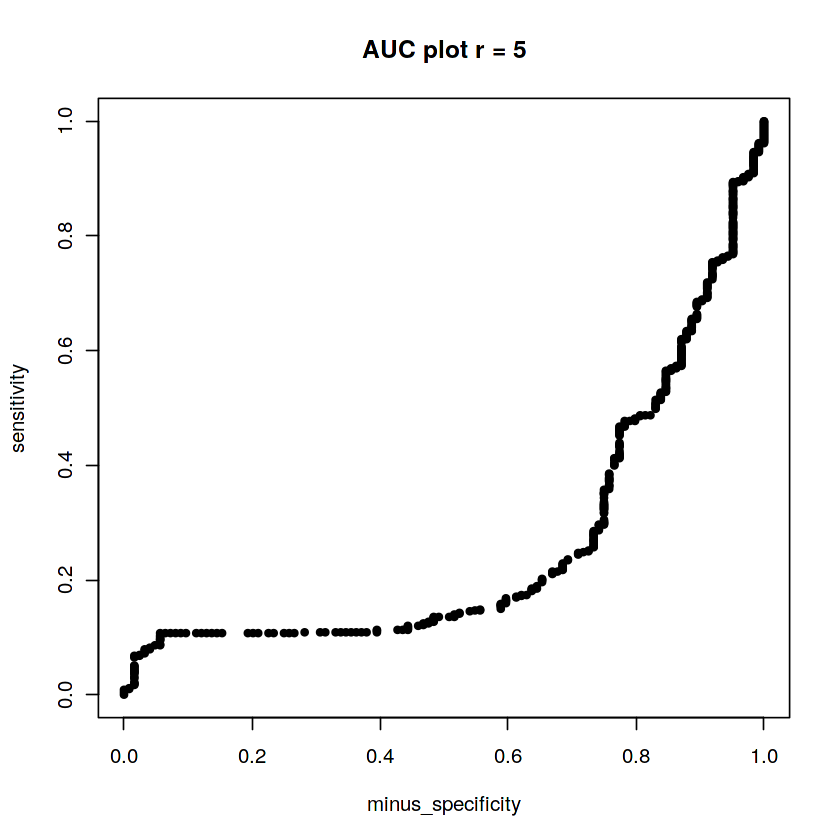

In [64]:
plot(roc_df_5,pch = 20, main= "AUC plot r = 5")

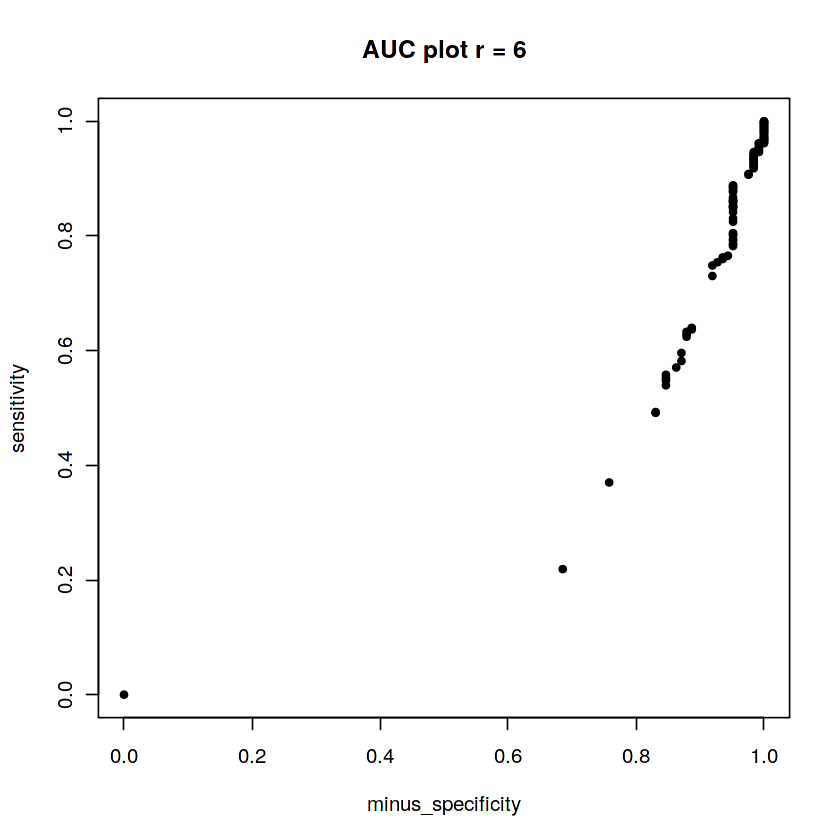

In [65]:
plot(roc_df_6,pch = 20, main= "AUC plot r = 6")

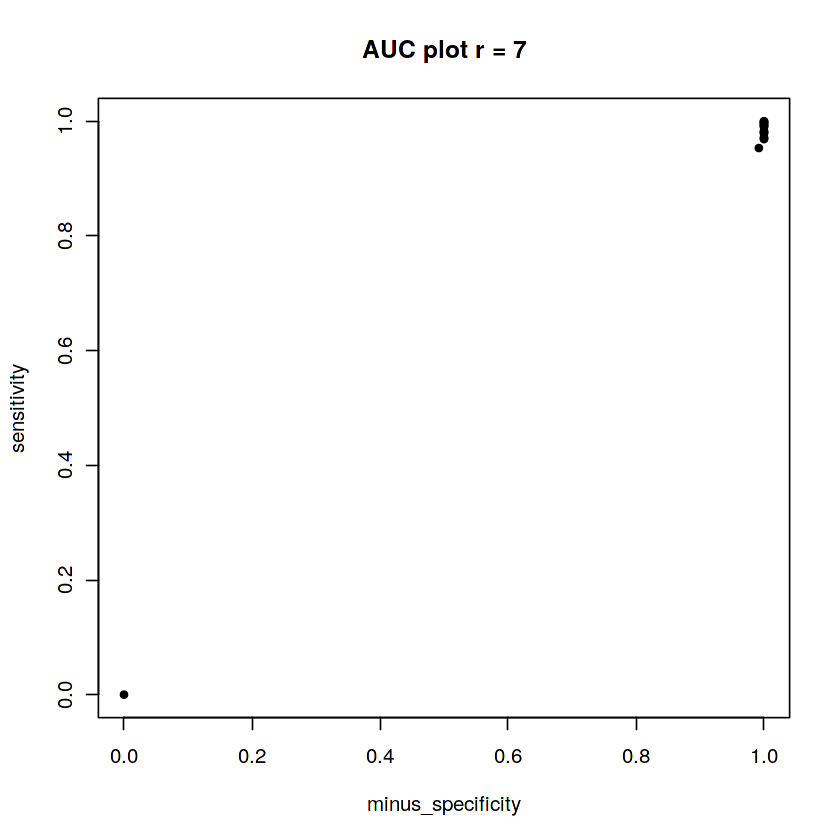

In [66]:
plot(roc_df_7,pch = 20, main= "AUC plot r = 7")

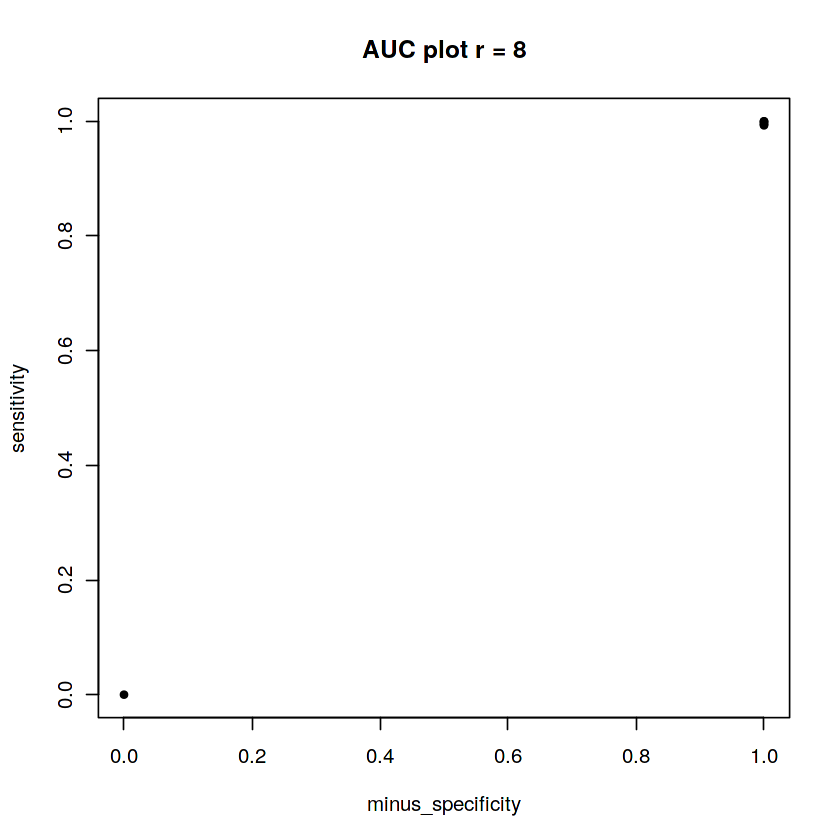

In [67]:
plot(roc_df_8,pch = 20, main= "AUC plot r = 8")

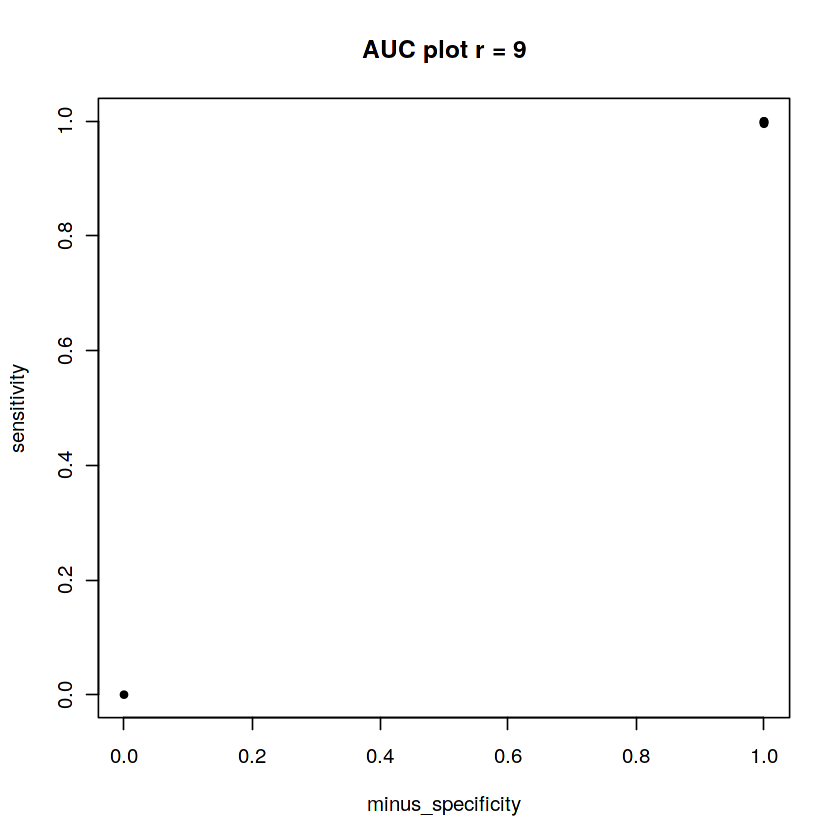

In [68]:
plot(roc_df_9,pch = 20, main= "AUC plot r = 9")